In [15]:
%run init.ipynb
from qiskit import *
import qiskit

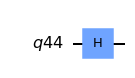

In [10]:
qr = QuantumRegister(1); qc = QuantumCircuit(qr); 
qc.h(qr[0])
qc.draw(output='mpl')


In [11]:
# Determina de qual circuito e de qual qubit fazer TEQ
qstc = state_tomography_circuits(qc,qr[0])
# No. de medidas pra estimar cada dist. de probabilidade
nshots = 819
2
job = execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
# 'ajusta' os resultados conforme o esperado do circuit qst
qstf = StateTomographyFitter(job.result(), qstc)
# extrai o operador densidade tomografado
rho = qstf.fit(method='lstsq')
# note que o que retorna é um array do numpy
rho

array([[0.50183149+0.j       , 0.49999627-0.0006105j],
       [0.49999627+0.0006105j, 0.49816851+0.j       ]])

In [12]:
# grafica a parte real de um estado de um qubit
def plot_rho1qb(rho):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    result = [rho[0,0], rho[0,1], rho[1,0], rho[1,1]]
    result = np.array(result, dtype=float)
    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax1 = fig.add_subplot(111, projection='3d')
    xlabels = np.array([r'$|0\rangle$', r'$|1\rangle$']); xpos = np.arange(xlabels.shape[0])
    ylabels = np.array([r'$|1\rangle$', r'$|0\rangle$']); ypos = np.arange(ylabels.shape[0])
    xposM, yposM = np.meshgrid(xpos, ypos, copy=False); zpos = result
    dx = 0.5; dy = 0.5; dz = zpos
    ax1.set_xlim(0, 1.5); ax1.set_ylim(0, 1.5); ax1.set_zlim(-1, 1)
    ax1.w_xaxis.set_ticks(xpos + dx/2.0); ax1.w_xaxis.set_ticklabels(xlabels)
    ax1.w_yaxis.set_ticks(ypos + dy/2.0); ax1.w_yaxis.set_ticklabels(ylabels)
    values = np.linspace(0.2, 1.0, xposM.ravel().shape[0]); colors = cm.rainbow(values)
    ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
    plt.show()

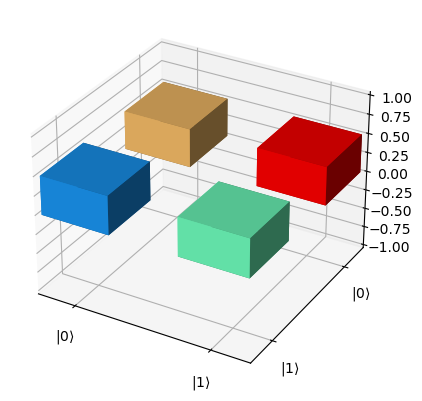

In [13]:
plot_rho1qb(rho.real)

In [ ]:
# carrega minha conta no IBMQ (o ID foi incluido no outro arquivo, nao precisa incluir aqui)
qiskit.IBMQ.save_account('7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de', 
                  overwrite = True)
qiskit.IBMQ.load_account();
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#provider.backends()
simulator = provider.get_backend('ibmq_qasm_simulator')
device = provider.get_backend('ibmq_lima')#ibmq_belem')
# para monitorar a execucao
from qiskit.tools.monitor import job_monitor
# executa os circuitos para TEQ no chip
job = qiskit.execute(qstc, backend = device, shots = nshots)
print(job.job_id()); job_monitor(job)

61ddc0d3a90e5307aa73472a
Job Status: job is queued (17)    

In [ ]:
# 'ajusta' os resultados conforme o esperado do circuit qst
qstf = StateTomographyFitter(job.result(), qstc)
# extrai o operador densidade tomografado
rho = qstf.fit(method='lstsq'); rho

In [ ]:
plot_rho1qb(rho.real)

In [ ]:
plot_rho1qb(rho.imag)